# Linear Regression assignment - 
## Bike Rental Case Study:

## * Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### * Business Goal:

To understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Step 1: Reading and Understanding the Data


In [362]:
# Suppress the warnings:

import warnings
warnings.filterwarnings("ignore")

In [363]:
# Import the numpy and pandas to read the data:

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [364]:
# read the data:

bike=pd.read_csv("/Users/husna/Downloads/day.csv")

In [365]:
# view the head of dataset:

bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


**Inspect the various aspects of the housing dataframe:**

In [366]:
bike.shape

(730, 16)

In [367]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [368]:
# to check the stastistics of numerical variables
bike[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


**Here from the above checking we understood that:**
- we can drop, instant( as it is just a record index),dteday(as we already have month and year column).
- addition of casual and registered gives cnt column, so we can drop that too.
- 'cnt' is the target variable/column.
- there are no missing values.


In [369]:
# dropping the column 'instant','dteday','casual','registered'
bike=bike.drop(['instant','dteday','casual','registered'],axis=1)

In [370]:
bike.shape

(730, 12)

In [371]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

**From the data dictionary , we understood the type of columns as:**

- Binary type: Yr, holiday, workingday
- Numerical types:temp, atemp, hum, windspeed, Cnt
- Categorical Types: season, mnth, weekday, weathersit

### Step 2: Data Visualisation

In [372]:
#import libraries for visualization purpose:

import matplotlib.pyplot as plt
import seaborn as sns

#### 2.1:  Numerical Variables

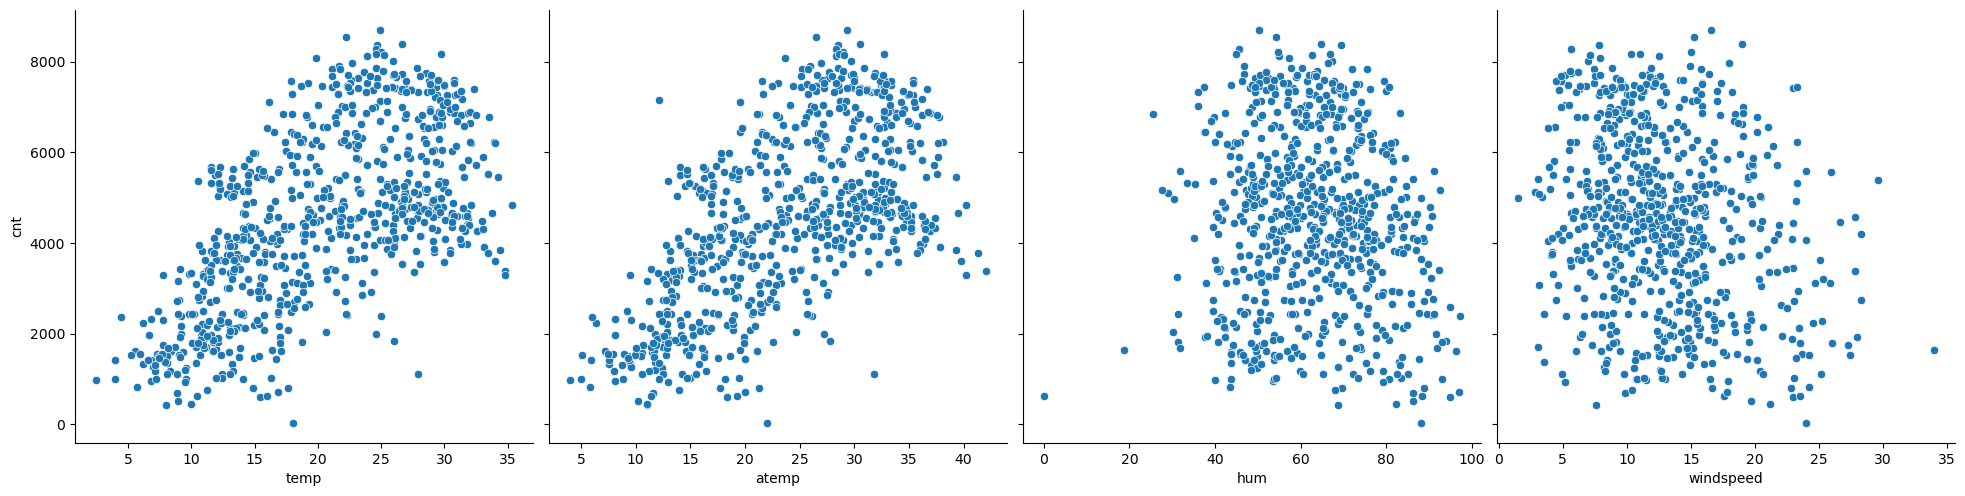

In [373]:
# scatter plot for continous variables with 'cnt'

sns.pairplot(bike,x_vars=['temp','atemp','hum','windspeed'],y_vars=['cnt'],kind='scatter',size=5,aspect=1)
plt.show()

**From the scatter plots above, we understood that there is some linear relationship between 'temp','atemp' with the target variable 'cnt', so we can move with Linear regression modelling.**

#### 2.2:  Categorical Variable

In [374]:
# Converting variables into categorical type 

bike[['yr','season','mnth','weekday','weathersit']]=bike[['yr','season','mnth','weekday','weathersit']].astype("category")

In [375]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(5), float64(4), int64(3)
memory usage: 44.8 KB


In [376]:
# Replacing the categorical variables (numbers with labels)

season_label={1:'spring', 2:'summer', 3:'fall', 4:'winter'}

mnth_label= {1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11 :'november',12:'december'}

weathersit_label={1:'Clear',2:'Cloudy',3:'Snowy',4:'Rainy'}

#Clear: Clear, Few clouds, Partly cloudy, Partly cloudy
#Cloudy: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#Snowy: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#Rainy: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


weekday_labels = { 0 : 'Sunday',1 : 'Monday',2 : 'Tuesday',3 : 'Wednesday',4 : 'Thursday',5 : 'Friday', 6 : 'Saturday'}

yr_label={0:'2018',1:'2019'}

In [377]:
# replacing the numerals with labels

bike.season=bike.season.replace(season_label)

bike.mnth=bike.mnth.replace(mnth_label)

bike.weathersit=bike.weathersit.replace(weathersit_label)

bike.weekday=bike.weekday.replace(weekday_labels)

bike.yr=bike.yr.replace(yr_label)

In [378]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,january,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,january,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,january,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,january,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,january,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [379]:
bike_cat=bike[['season','yr','mnth','weathersit','weekday','holiday']]
for column in bike_cat.columns:
    unique_values = bike_cat[column].unique()
    print(f"Unique values in column'{column}': {unique_values}")

Unique values in column'season': ['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']
Unique values in column'yr': ['2018', '2019']
Categories (2, object): ['2018', '2019']
Unique values in column'mnth': ['january', 'february', 'march', 'april', 'may', ..., 'august', 'september', 'october', 'november', 'december']
Length: 12
Categories (12, object): ['january', 'february', 'march', 'april', ..., 'september', 'october', 'november', 'december']
Unique values in column'weathersit': ['Cloudy', 'Clear', 'Snowy']
Categories (3, object): ['Clear', 'Cloudy', 'Snowy']
Unique values in column'weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
Unique values in column'holiday': [0 1]


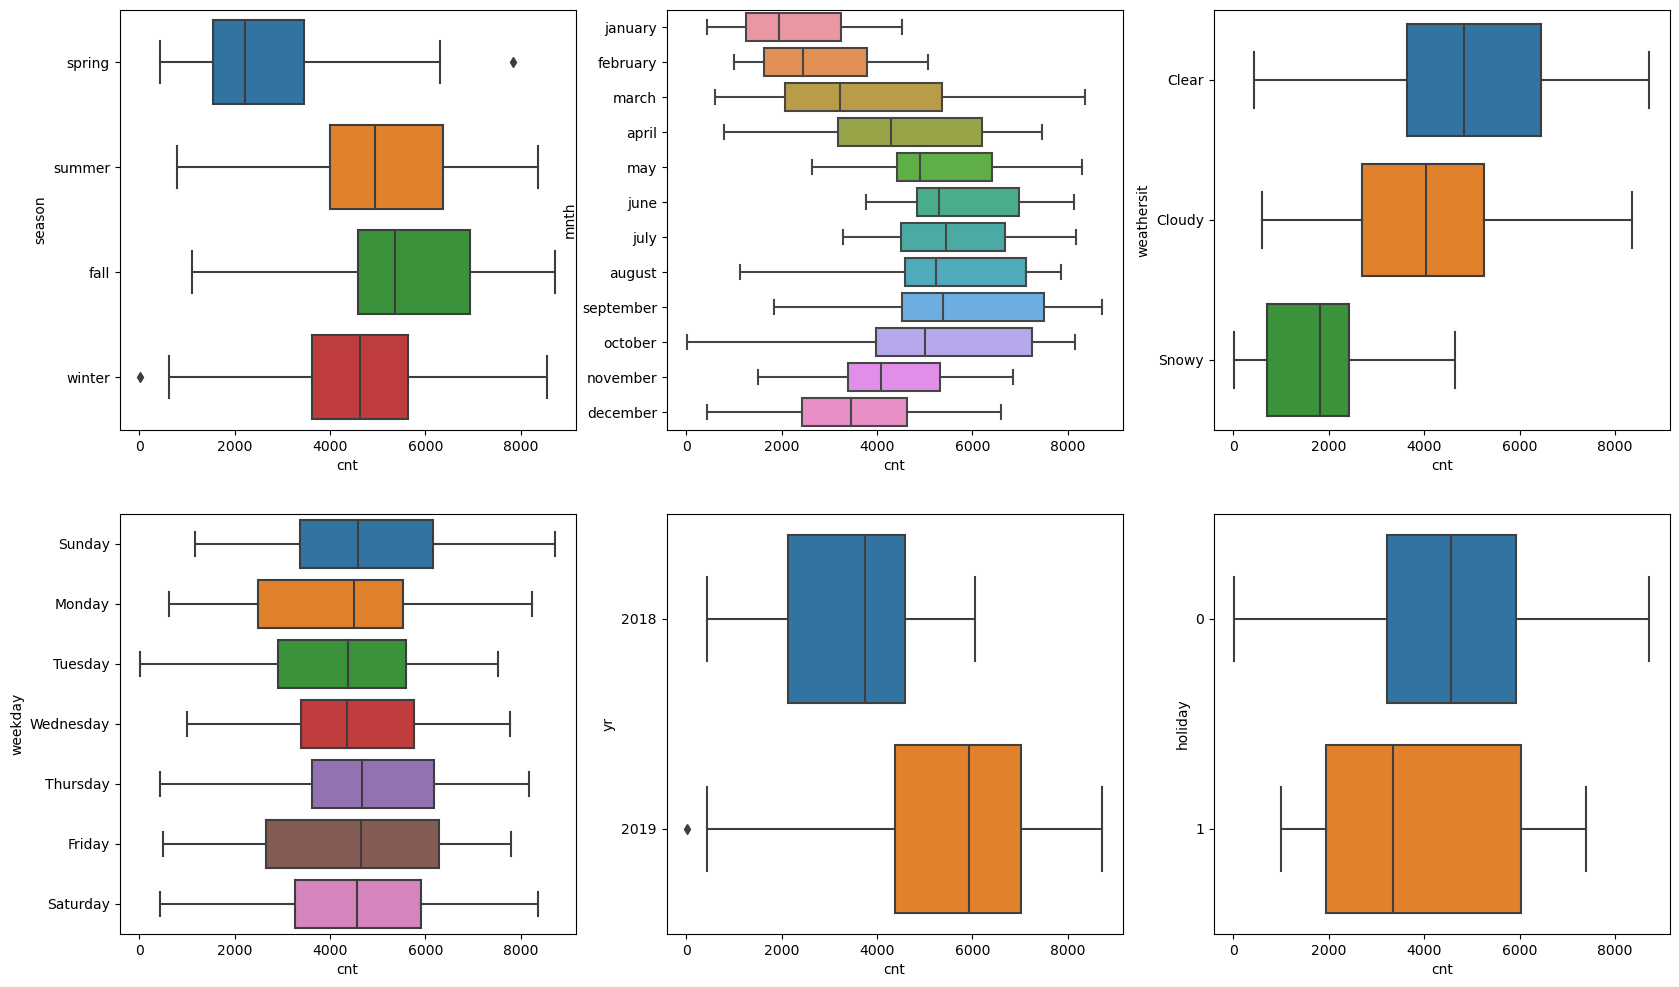

In [380]:
# visualising of categorical variables (boxplots)

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(y='season',x='cnt',data=bike,orient="h")
plt.subplot(2,3,2)
sns.boxplot(y='mnth',x='cnt',data=bike,orient="h")
plt.subplot(2,3,3)
sns.boxplot(y='weathersit',x='cnt',data=bike,orient="h")
plt.subplot(2,3,4)
sns.boxplot(y='weekday',x='cnt',data=bike,orient="h")
plt.subplot(2,3,5)
sns.boxplot(y='yr',x='cnt',data=bike,orient="h")
plt.subplot(2,3,6)
sns.boxplot(y='holiday',x='cnt',data=bike,orient="h")
plt.show()

##### Insights:
- **Most of the bikes are rented in fall season, followed by summer and winter.**
- **Least number of bikes are rented in spring season**
- **Most number of bikes are rented in the month of September and least number in January**
- **Most number of bikes rented in the weather condition of Clear, Few clouds, Partly cloudy, Partly cloudy, least on Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.**
- **Most demand for bikes are on Sunday, Thursday, Friday.**
- **Most bikes rent in the year 2019.**
- **The median of bikes rented is more in the days which are working and not holidays.**

#### 2.3: Correlation amomg the continous variables:

In [381]:
correlation_var = bike[['temp','hum','atemp','windspeed','cnt']].corr()
correlation_var

,temp,hum,atemp,windspeed,cnt
temp,1.000000,0.128565,0.991696,-0.158186,0.627044
hum,0.128565,1.000000,0.141512,-0.248506,-0.098543
atemp,0.991696,0.141512,1.000000,-0.183876,0.630685
windspeed,-0.158186,-0.248506,-0.183876,1.000000,-0.235132
cnt,0.627044,-0.098543,0.630685,-0.235132,1.000000


<Axes: >

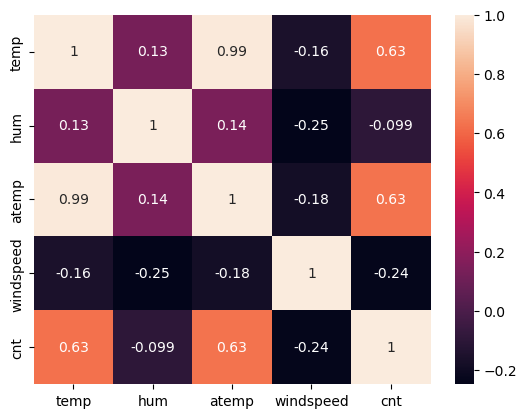

In [382]:
sns.heatmap(correlation_var,annot=True)

**There is a high correlation between 'temp' and 'atemp', so it is better to keep one variable as it have similair correlation with target variable'cnt'.**

In [383]:
#dropping 'atemp'
bike=bike.drop('atemp', axis=1)

In [384]:
bike.shape

(730, 11)

### Step 3: Data Preparation

#### 3.1:  Checking the data and creating dummy variable

In [385]:
#checking the column for its datatypes

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 39.1 KB


In [386]:
#converting weekday and holiday to category type

bike[['holiday','workingday']]=bike[['holiday','workingday']].astype('category')

In [387]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,january,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,january,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,january,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,january,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,january,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [388]:
# creating list of categorical variables for creating dummies
var_list=['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [389]:
#creating dummy variables

dummy=pd.get_dummies(bike[var_list],drop_first=True)
dummy.head()

,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,holiday_1,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Cloudy,weathersit_Snowy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [390]:
# Concating both the dataframe, bike and dummy 
bike_new=pd.concat([bike,dummy],axis=1)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,holiday_1,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Cloudy,weathersit_Snowy
0,spring,2018,january,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,spring,2018,january,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,spring,2018,january,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,spring,2018,january,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,spring,2018,january,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [391]:
#Dropping original columns

bike_new=bike_new.drop(['season','yr','mnth','holiday','weekday','workingday','weathersit'],axis=1)

In [392]:
bike_new.head()

,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,holiday_1,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Cloudy,weathersit_Snowy
0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


#### 3.2 :  Splitting the data set into Test & Train subsets

In [393]:
#import necessary library

import sklearn
from sklearn.model_selection import train_test_split

In [394]:
df_train,df_test=train_test_split(bike_new,train_size=0.7,random_state=100)

In [395]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


#### 3.3 : Rescaling

In [396]:
#import necessary library

from sklearn.preprocessing import MinMaxScaler

In [397]:
# Instantiate an object

scaler=MinMaxScaler()

#create the list of numerical variable

num_vars=['temp','hum','windspeed','cnt']

#fit on data

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

df_train.head()

,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,holiday_1,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Cloudy,weathersit_Snowy
576,0.815169,0.725633,0.264686,0.827658,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
426,0.442393,0.640189,0.255342,0.465255,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0.191095,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [398]:
df_train.describe()

,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,holiday_1,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Cloudy,weathersit_Snowy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,0.507843,0.066667,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.025490,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.711765,0.345098,0.029412
std,0.225858,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,0.500429,0.249689,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.157763,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.453386,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3.4 : Multicollinearity

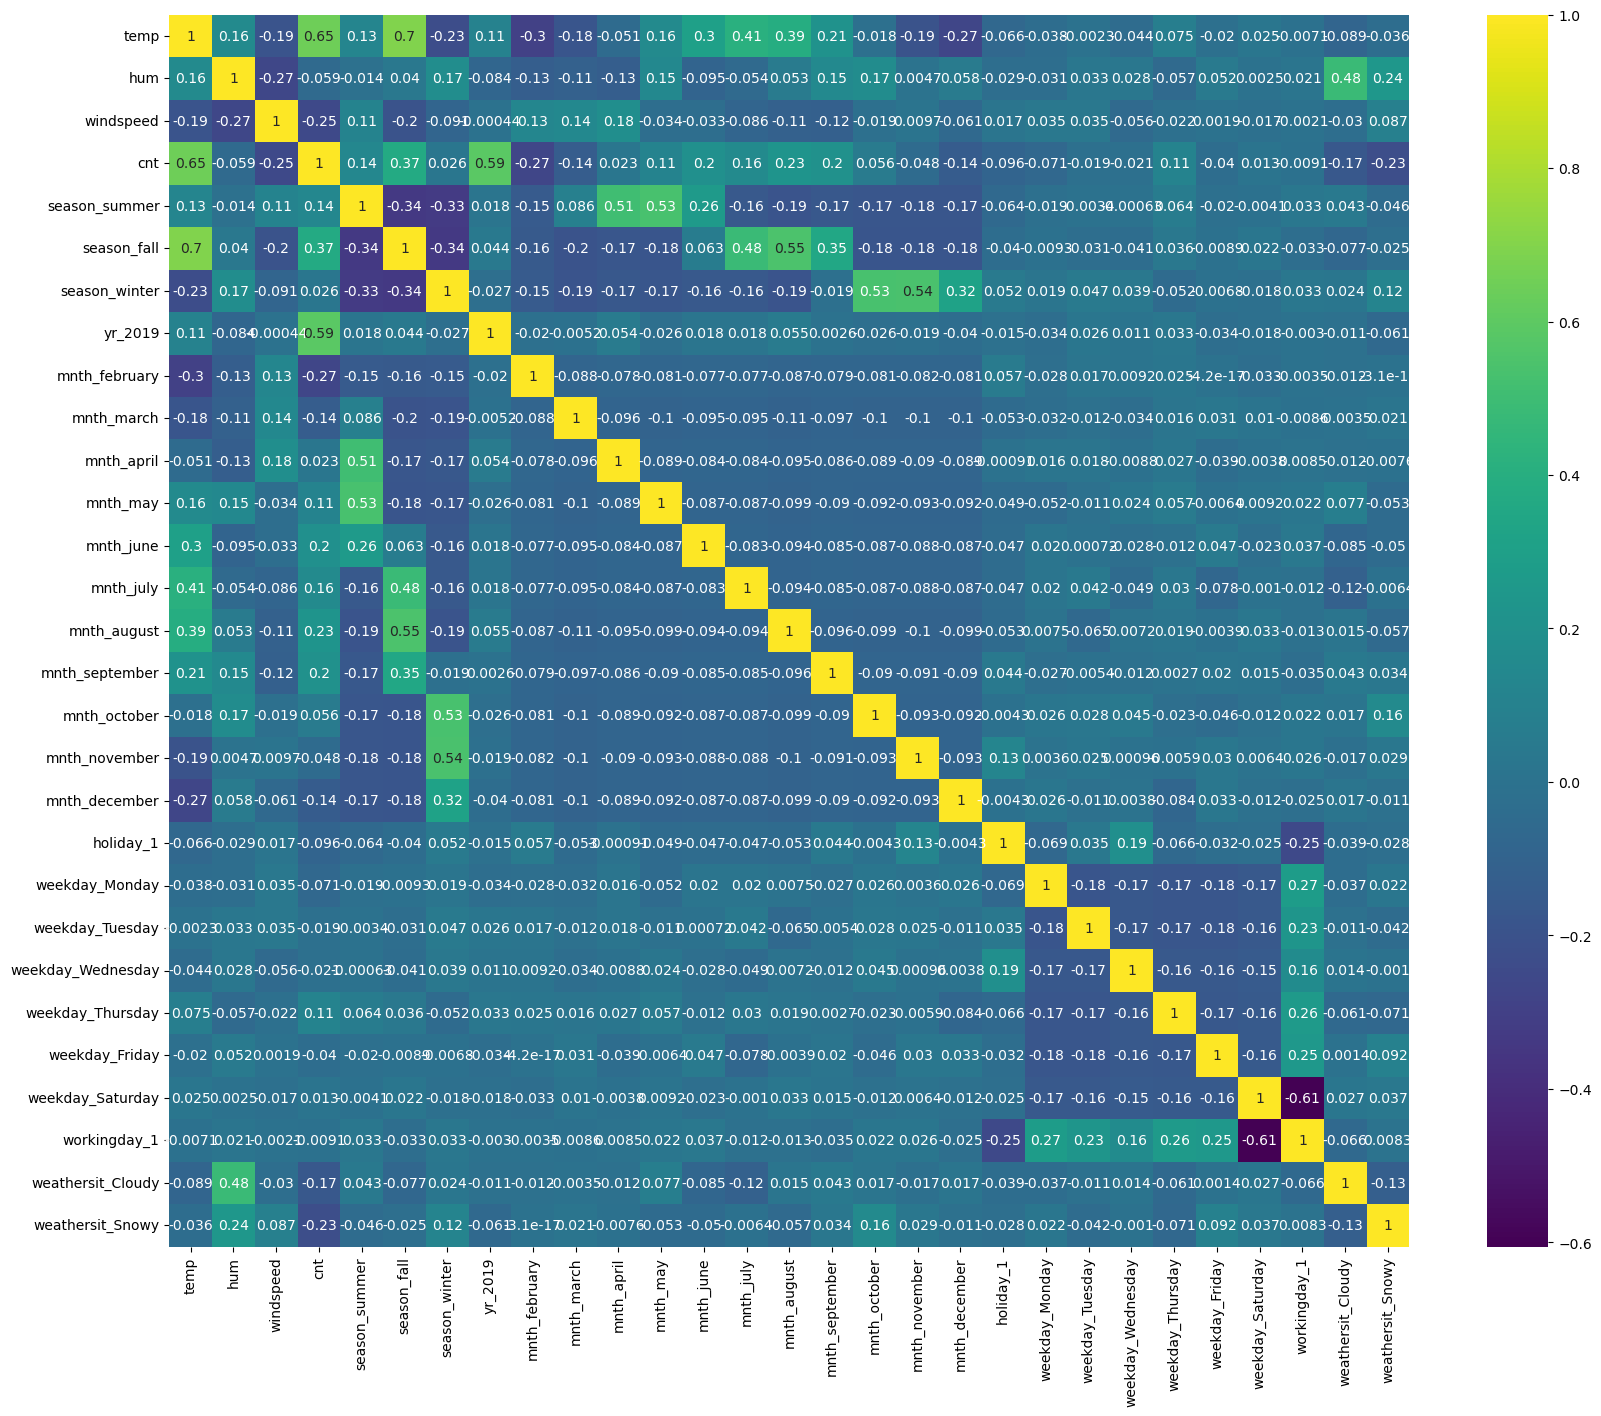

In [399]:
# Let's check the correlation coefficients with heatmap to see which variables are highly correlated

plt.figure(figsize=(20,16))
sns.heatmap(df_train.corr(),annot=True,cmap='viridis')
plt.show()

In [400]:
# Dividing thentrain set into X_train and y_train for model building

y_train=df_train.pop('cnt')
X_train=df_train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [401]:
X_train.shape

(510, 28)

### Step 4 : Model Building

Approach taken for model building:

- 15 best variables are chosen using RFE
- Then p-value method  and VIF method are followed for further elimination.

#### 4.1: RFE Feature Ranking

In [402]:

# import the libraries required for RFE(Recursive feature elimination)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [403]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(estimator=lm, n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [404]:
# RFE Feature Ranking

rfe_ranking=pd.DataFrame({'rank':rfe.ranking_, 'support':rfe.support_,'features':X_train.columns}).sort_values(by='rank',ascending=True)

In [405]:
rfe_ranking

,rank,support,features
0,1,True,temp
18,1,True,holiday_1
15,1,True,mnth_october
14,1,True,mnth_september
26,1,True,weathersit_Cloudy
10,1,True,mnth_may
8,1,True,mnth_march
13,1,True,mnth_august
6,1,True,yr_2019
1,1,True,hum


In [406]:
col=X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_summer', 'season_fall',
       'season_winter', 'yr_2019', 'mnth_march', 'mnth_may', 'mnth_august',
       'mnth_september', 'mnth_october', 'holiday_1', 'weathersit_Cloudy',
       'weathersit_Snowy'],
      dtype='object')

In [407]:
X_train.columns[~rfe.support_]

Index(['mnth_february', 'mnth_april', 'mnth_june', 'mnth_july',
       'mnth_november', 'mnth_december', 'weekday_Monday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday',
       'weekday_Saturday', 'workingday_1'],
      dtype='object')

In [408]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [410]:
X_train_rfe.shape

(510, 15)

**4.2 : Building model using statsmodel, for the detailed statistics**

### Model 1:

In [411]:
# Import libraries for checking VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [412]:
#VIF check

# create a dataframe with variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,24.63
1,hum,15.53
4,season_fall,8.80
2,windspeed,3.81
3,season_summer,3.75
5,season_winter,3.11
13,weathersit_Cloudy,2.15
6,yr_2019,2.05
9,mnth_august,1.85
8,mnth_may,1.68


In [413]:
# import the library
import statsmodels.api as sm

# Add a constanr
X_train_lm1=sm.add_constant(X_train_rfe)

#Running the linear model
lr1=sm.OLS(y_train,X_train_lm1).fit()

In [414]:
#check the parameters

lr1.params

const                0.237384
temp                 0.486920
hum                 -0.179606
windspeed           -0.183865
season_summer        0.116592
season_fall          0.042479
season_winter        0.152975
yr_2019              0.230442
mnth_march           0.032292
mnth_may             0.028201
mnth_august          0.050905
mnth_september       0.120667
mnth_october         0.040741
holiday_1           -0.088900
weathersit_Cloudy   -0.054170
weathersit_Snowy    -0.242870
dtype: float64

In [417]:
#Let's see the summary of our linear model

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Mon, 29 May 2023   Prob (F-statistic):          1.00e-188
Time:                        07:07:31   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2374      0.02

**Removing variable 'mnth_may' as it has P-value greater than 0.05**

### Model 2:

In [418]:
X_train_new= X_train_rfe.drop(['mnth_may'],axis=1)

In [419]:
#VIF check

# create a dataframe with variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,24.02
1,hum,15.48
4,season_fall,8.53
2,windspeed,3.73
3,season_summer,3.53
5,season_winter,3.05
12,weathersit_Cloudy,2.15
6,yr_2019,2.03
8,mnth_august,1.85
10,mnth_october,1.63


In [420]:
# Add a constanr
X_train_lm2=sm.add_constant(X_train_new)

#Running the linear model
lr2=sm.OLS(y_train,X_train_lm2).fit()

#check the parameters

lr2.params

const                0.232239
temp                 0.496526
hum                 -0.171899
windspeed           -0.185786
season_summer        0.122505
season_fall          0.036114
season_winter        0.150156
yr_2019              0.229774
mnth_march           0.027934
mnth_august          0.050457
mnth_september       0.120186
mnth_october         0.039287
holiday_1           -0.090038
weathersit_Cloudy   -0.054371
weathersit_Snowy    -0.244911
dtype: float64

In [421]:
#Let's see the summary of our linear model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 29 May 2023   Prob (F-statistic):          2.46e-189
Time:                        07:24:08   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2322      0.02

**Removing variable 'season_fall' as it has P-value greater than 0.05**

### Model 3:

In [422]:
X_train_new= X_train_new.drop(['season_fall'],axis=1)

In [423]:
#VIF check

# create a dataframe with variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,14.73
0,temp,10.01
2,windspeed,3.70
4,season_winter,2.32
11,weathersit_Cloudy,2.14
5,yr_2019,2.02
3,season_summer,1.84
7,mnth_august,1.61
9,mnth_october,1.60
8,mnth_september,1.34


In [424]:
# Add a constanr
X_train_lm3=sm.add_constant(X_train_new)

#Running the linear model
lr3=sm.OLS(y_train,X_train_lm3).fit()

#check the parameters

lr3.params

const                0.232586
temp                 0.537143
hum                 -0.180550
windspeed           -0.189317
season_summer        0.105884
season_winter        0.139280
yr_2019              0.228689
mnth_march           0.023293
mnth_august          0.060488
mnth_september       0.129246
mnth_october         0.035508
holiday_1           -0.091705
weathersit_Cloudy   -0.053215
weathersit_Snowy    -0.240076
dtype: float64

In [425]:
#Let's see the summary of our linear model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Mon, 29 May 2023   Prob (F-statistic):          5.94e-190
Time:                        07:29:41   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2326      0.02

**Removing variable 'mnth_march' as it has P-value greater than 0.05**

### Model 4:

In [427]:
X_train_new= X_train_new.drop(['mnth_march'],axis=1)

In [428]:
#VIF check

# create a dataframe with variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,14.38
0,temp,9.88
2,windspeed,3.59
4,season_winter,2.25
10,weathersit_Cloudy,2.13
5,yr_2019,2.02
3,season_summer,1.84
6,mnth_august,1.60
8,mnth_october,1.60
7,mnth_september,1.34


In [429]:
# Add a constanr
X_train_lm4=sm.add_constant(X_train_new)

#Running the linear model
lr4=sm.OLS(y_train,X_train_lm4).fit()

#check the parameters

lr4.params

const                0.239027
temp                 0.531625
hum                 -0.181797
windspeed           -0.186835
season_summer        0.105803
season_winter        0.135308
yr_2019              0.228857
mnth_august          0.058540
mnth_september       0.127705
mnth_october         0.035821
holiday_1           -0.094111
weathersit_Cloudy   -0.053105
weathersit_Snowy    -0.238470
dtype: float64

In [430]:
#Let's see the summary of our linear model
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 29 May 2023   Prob (F-statistic):          1.49e-190
Time:                        07:34:52   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2390      0.02

**Removing the variable 'hum' based on its Very High 'VIF' value.**

### Model 5:

In [431]:
X_train_new= X_train_new.drop(['hum'],axis=1)

In [432]:
#VIF check

# create a dataframe with variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.11
1,windspeed,3.11
4,yr_2019,2.00
3,season_winter,1.93
2,season_summer,1.83
5,mnth_august,1.59
7,mnth_october,1.59
9,weathersit_Cloudy,1.49
6,mnth_september,1.34
10,weathersit_Snowy,1.10


In [433]:
# Add a constanr
X_train_lm5=sm.add_constant(X_train_new)

#Running the linear model
lr5=sm.OLS(y_train,X_train_lm5).fit()

#check the parameters

lr5.params

const                0.134589
temp                 0.509882
windspeed           -0.151673
season_summer        0.102630
season_winter        0.126600
yr_2019              0.232902
mnth_august          0.056896
mnth_september       0.120773
mnth_october         0.031119
holiday_1           -0.095584
weathersit_Cloudy   -0.081965
weathersit_Snowy    -0.286944
dtype: float64

In [434]:
#Let's see the summary of our linear model
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 29 May 2023   Prob (F-statistic):          9.45e-187
Time:                        07:39:36   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1346      0.01

**Removing variable 'mnth_october' as it has P-value greater than 0.05**

### Model 6:

In [435]:
X_train_new= X_train_new.drop(['mnth_october'],axis=1)

In [436]:
#VIF check

# create a dataframe with variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.01
1,windspeed,3.10
4,yr_2019,2.00
2,season_summer,1.82
5,mnth_august,1.58
8,weathersit_Cloudy,1.49
3,season_winter,1.48
6,mnth_september,1.31
9,weathersit_Snowy,1.08
7,holiday_1,1.04


In [437]:
# Add a constanr
X_train_lm6=sm.add_constant(X_train_new)

#Running the linear model
lr6=sm.OLS(y_train,X_train_lm6).fit()

#check the parameters

lr6.params

const                0.130722
temp                 0.517336
windspeed           -0.149709
season_summer        0.101217
season_winter        0.137090
yr_2019              0.232563
mnth_august          0.054141
mnth_september       0.116291
holiday_1           -0.096575
weathersit_Cloudy   -0.081139
weathersit_Snowy    -0.281852
dtype: float64

In [438]:
#Let's see the summary of our linear model
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Mon, 29 May 2023   Prob (F-statistic):          2.62e-187
Time:                        07:42:42   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1307      0.01

**Removing variable 'mnth_august' as 'temp'with higher VIF cannot be removed as it has shown to be important variable during EDA**

### Model 7:

In [439]:
X_train_new= X_train_new.drop(['mnth_august'],axis=1)

In [440]:
#VIF check

# create a dataframe with variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.68
1,windspeed,3.06
4,yr_2019,2.00
2,season_summer,1.57
7,weathersit_Cloudy,1.48
3,season_winter,1.37
5,mnth_september,1.20
8,weathersit_Snowy,1.08
6,holiday_1,1.04


In [441]:
# Add a constanr
X_train_lm7=sm.add_constant(X_train_new)

#Running the linear model
lr7=sm.OLS(y_train,X_train_lm7).fit()

#check the parameters

lr7.params

const                0.125926
temp                 0.548008
windspeed           -0.153246
season_summer        0.088080
season_winter        0.129345
yr_2019              0.232861
mnth_september       0.101195
holiday_1           -0.098685
weathersit_Cloudy   -0.078375
weathersit_Snowy    -0.282869
dtype: float64

In [442]:
#Let's see the summary of our linear model
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 29 May 2023   Prob (F-statistic):          2.83e-186
Time:                        07:55:52   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1259      0.01

**Insight**

**This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).**

### Step 5 :Validating Assumptions

#### 5.1: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [443]:
y_train_pred=lr7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

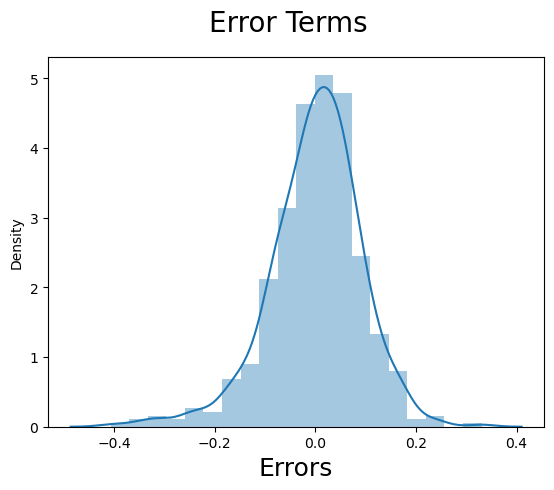

In [461]:
res=y_train-y_train_pred

#plotting the histogram of the error terms

fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms', fontsize = 20)   # Plot heading 
plt.xlabel('Errors', fontsize = 18)          # X-label

**Insight**

From the above histogram, we could see that the Residuals are normally distributed with mean zero. Hence our assumption for Linear Regression is valid.

#### 5.2: Check for Linearity and Homoscedasticity

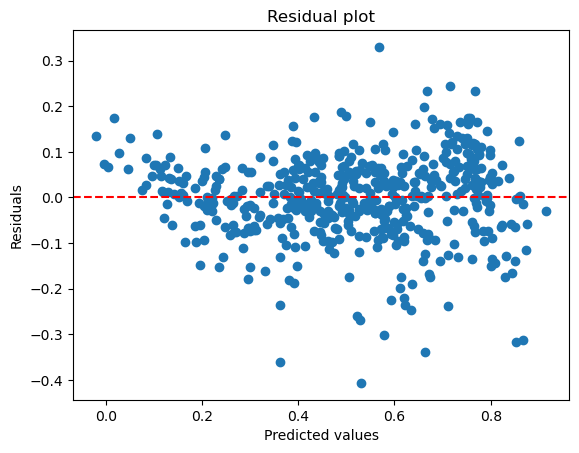

In [465]:
# Check for Linearity and Homoscedasticity

plt.scatter(y_train_pred, res)
plt.axhline(y=0, color='red', linestyle='--')  # Adding a horizontal line at y=0 for reference
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()


**Insight:**

**Linearity:** 
- In the scatter plot, if the residuals are randomly scattered around the horizontal line at y=0 without any clear trends or patterns, it suggests that the model captures the linearity assumption. If there are distinct patterns or trends in the scatter plot, it indicates a violation of the linearity assumption.
- Here there shows no clear trends or pattens and predictor variables in the regression have a straight-line relationship with the outcome variable.

**Homoscedasticity Check:**
- The assumption of homoscedasticity (also known as constant variance) in linear regression states that the variability of the residuals should be constant across the range of predicted values.Here the residuals are uniformly distributed around the horizontal line at y=0 without any discernible patterns or trends, it suggests that the assumption of homoscedasticity holds.
- If the spread of residuals varies noticeably across the range of predicted values, it indicates a violation of the homoscedasticity assumption.


**Linearity focuses on the relationship between the predictors and the target variable, while homoscedasticity examines the variability of residuals across the range of predicted values.**

### Step 6 : Making predictions

**Applying the scaling on the test sets**

Now that we have fitted the model and checked the assumptions,let us make predictions using the final model (lr7)

In [448]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 

num_vars=['temp','hum','windspeed','cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

In [449]:
df_test.head()

,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,holiday_1,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Cloudy,weathersit_Snowy
184,0.831783,0.657364,0.084219,0.692706,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
535,0.901354,0.610133,0.153728,0.712034,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
221,0.881625,0.437098,0.339570,0.547400,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
152,0.817246,0.314298,0.537414,0.569029,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [451]:
df_test.describe()

,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,holiday_1,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Cloudy,weathersit_Snowy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,0.481818,0.100000,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.036364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.640909,0.318182,0.027273
std,0.233187,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,0.500809,0.300684,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.187620,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.480828,0.466833,0.163248
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.755981,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [452]:
# Dividing into X_test and y_test

y_test=df_test.pop('cnt')
X_test=df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               220 non-null    float64
 1   hum                220 non-null    float64
 2   windspeed          220 non-null    float64
 3   season_summer      220 non-null    uint8  
 4   season_fall        220 non-null    uint8  
 5   season_winter      220 non-null    uint8  
 6   yr_2019            220 non-null    uint8  
 7   mnth_february      220 non-null    uint8  
 8   mnth_march         220 non-null    uint8  
 9   mnth_april         220 non-null    uint8  
 10  mnth_may           220 non-null    uint8  
 11  mnth_june          220 non-null    uint8  
 12  mnth_july          220 non-null    uint8  
 13  mnth_august        220 non-null    uint8  
 14  mnth_september     220 non-null    uint8  
 15  mnth_october       220 non-null    uint8  
 16  mnth_november      220 n

In [453]:
# Now let's use our model to make predictions.

#Selecting the variables that were part of final model.

col1=X_train_new.columns
X_test=X_test[col1]

# Adding constant variable to test dataframe

X_test_lm7=sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              220 non-null    float64
 1   temp               220 non-null    float64
 2   windspeed          220 non-null    float64
 3   season_summer      220 non-null    uint8  
 4   season_winter      220 non-null    uint8  
 5   yr_2019            220 non-null    uint8  
 6   mnth_september     220 non-null    uint8  
 7   holiday_1          220 non-null    uint8  
 8   weathersit_Cloudy  220 non-null    uint8  
 9   weathersit_Snowy   220 non-null    uint8  
dtypes: float64(3), uint8(7)
memory usage: 8.4 KB


In [454]:
# Making predictions using the final model (lr7)

y_pred=lr7.predict(X_test_lm7)

### Step 7 : Model Evaluation

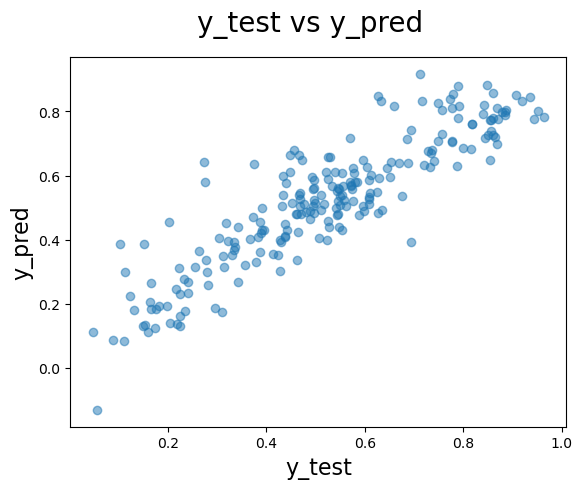

In [456]:
# Plotting y_test and y_pred to understand the spread

fig=plt.figure()
plt.scatter(y_test,y_pred, alpha=0.5)
fig.suptitle("y_test vs y_pred", fontsize=20)
plt.xlabel('y_test',fontsize=16)
plt.ylabel('y_pred',fontsize=16)
plt.show()

### Step 8: R^2 Value for TEST

In [457]:
# import the libraries for r^2 score

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.7941977535477243

**Adjusted R^2 Value for TEST**

In [458]:
# Get the shape of X_test
X_test.shape

(220, 9)

In [460]:
r2=0.7941977535477243 # r^2, calculated from above step

n=X_test.shape[0]  # n is the rows in X

p=X_test.shape[1]  # p is the number of features

# Applying the adjusted R formula

adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)

adjusted_r2


0.7853776572711981

### Step 9 : Final Result comparison

- **Train R^2 : 0.830**
- **Train Adjusted R^2 : 0.827**
- **Test R^2 : 0.794**
- **Test Adjusted R^2 : 0.785**

**This seems to be a really good model that is performig reasonabaly well**

### Step 10 : Final Model interpretation

**We can see that the equation of our best fitted line on lr7:**

*cnt = 0.125926 + (temp  × 0.548008) - (windspeed  × 0.153246) + (season_summer  × 0.088080) + (season_winter × 0.129345) + (yr_2019  ×   0.232861) + (mnth_september  × 0.101195) - (holiday_1   ×  0.098685) - (weathersit_Cloudy ×0.078375) - (weathersit_Snowy × 0.282869)*

**As per our final Model, the top 3 predictor variables that influences the bike booking are:**

- **Temperature (temp)** - A coefficient value of ‘0.548008’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.548008 units.

- **Weather Situation 3( weathersit_Snowy- Light Snowy, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)** - A coefficient value of ‘-0.282861’ indicated that, a unit increase in Weathersit_3 variable decreases the bike hire numbers by 0.282861 units.

- **Year (yr)** - A coefficient value of ‘0.232861’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.232861 units.
  
   

The next best features that can also be considered are:

- **season_winter**- A coefficient value of ‘0.129345’ indicates that a unit increase in season_4 variable increases the bike hire numbers by 0.129345 units. 
- **windspeed:** - A coefficient value of ‘-0.153246’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.153246 units.

**So it is suggested to consider these variables while planning to achieve maximum booking.**

### ************************************************ END OF REPORT *****************************************************